# Laboratorio 4 | Data Science
* **Mónica Salvatierra** - 22249
* **Derek Arreaga** - 22537

Los objetivos de este laboratorio son:
1. Comprender la diferencia entre una red neuronal multicapa simple (ANN) y una red
convolucional (CNN) para clasificación de imágenes.

2. Implementar desde cero una CNN en Keras/TensorFlow para el conjunto de datos
CIFAR-10.

3. Entrenar, evaluar y analizar los resultados obtenidos con respecto a un modelo ANN
simple.

4. Reflexionar sobre las ventajas y limitaciones de las CNN en visión por computadora.

5. Aplicar “Data Augmentation” para mejorar la capacidad
de generalización del modelo

## Parte 1: Preparación del Conjunto de Datos (CIFAR-10)

In [ ]:
#%pip install numpy matplotlib tensorflow

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10


Tamaño del conjunto de entrenamiento: (50000, 32, 32, 3)
Tamaño del conjunto de prueba: (10000, 32, 32, 3)


**1. Importar y cargar el conjunto de datos CIFAR-10**

In [19]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [22]:
print("Tamaño del conjunto de entrenamiento:", x_train.shape)
print("Tamaño del conjunto de prueba:", x_test.shape)

Tamaño del conjunto de entrenamiento: (50000, 32, 32, 3)
Tamaño del conjunto de prueba: (10000, 32, 32, 3)


In [20]:
min_val = np.min(x_train)
max_val = np.max(x_train)

print(f"Valor mínimo: {min_val}")
print(f"Valor máximo: {max_val}")

Valor mínimo: 0
Valor máximo: 255


**2. Normalizar los datos: de rango [0,255] a [0,1]**

Como se observó anteriormente, los valores de nuestro **dataset** son entre **0** y **255**, ahora los normalizamos para que sean entre **0.0** a **1.0**

In [23]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

print("Valores normalizados en rango:", x_train.min(), "a", x_train.max())


Valores normalizados en rango: 0.0 a 1.0


**Ejemplos de Imágenes**

Para desplegar los ejemplos, visitamos la documentación oficial del dataset [**CIFAR-10**](https://www.cs.toronto.edu/~kriz/cifar.html), ahí encontramos que las categorías de las imágenes corresponden a los siguientes números:

|Categoría|Índice|
|---|---|
|avión|0|
|auto| 1|
|pájaro| 2|
|gato| 3|
|ciervo|4|
|perro| 5|
|rana|  6|
|caballo|7|
|barco|8|
|camión| 9|



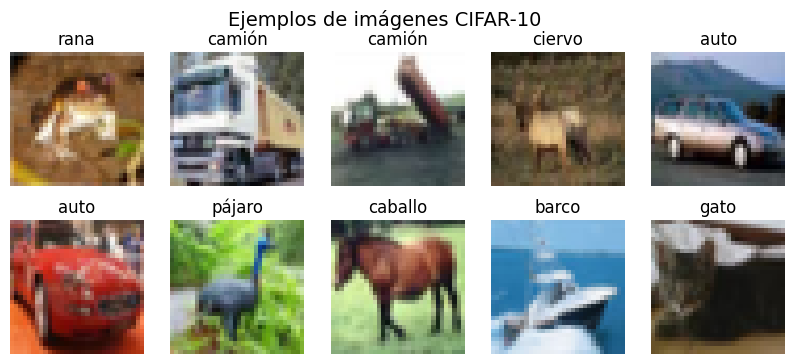

In [24]:
class_names = ["avión", "auto", "pájaro", "gato", "ciervo",
               "perro", "rana", "caballo", "barco", "camión"]

plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis("off")
plt.suptitle("Ejemplos de imágenes CIFAR-10", fontsize=14)
plt.show()
